<h1 align="center"><font color="yellow">Introdução ao LangChain — Uma ferramenta poderosa para trabalhar com modelos de linguagem grandes</font></h1>

<font color="yellow">Data Scientist.: Eddy Giusepe Chirinos Isidro</font>

# Contextualizando 

Neste tutorial aprenderemos a construir um aplicativo da Web usando o modelo de linguagem `OpenAI GPT3` e `SimpleSequentialChain` de `LangChain` em um front-end `Streamlit`, para este objetivo seguiremos os vídeos de Youtbe do [Avra](https://www.youtube.com/@Avra_b/playlists).

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*MOR5HpojnJBJbvks_yfWBQ.png)

# O que é LangChain

`LangChain` é uma ferramenta poderosa que pode ser usada para trabalhar com Large Language Models (`LLMs`). Os LLMs são de natureza muito geral, o que significa que, embora possam executar muitas tarefas com eficácia, eles podem não ser capazes de fornecer respostas específicas a perguntas ou tarefas que exijam conhecimento ou experiência de `domínio profundo`. <font color="red">Por exemplo:</font> imagine que você deseja usar um LLM para responder a perguntas sobre um campo específico, como `medicina` ou `direito`. Embora o LLM possa responder a perguntas gerais sobre o campo, pode não ser capaz de fornecer respostas mais detalhadas ou diferenciadas que exijam conhecimento especializado ou experiência.


![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*UTHw0sfJ6cFJYDaSE_PdlA.png)

# Por que precisamos do LangChain?

Para contornar essa limitação, o `LangChain` oferece uma abordagem útil em que o `corpus de texto` é pré-processado, dividindo-o em blocos ou resumos, incorporando-os em um `espaço vetorial` e procurando blocos semelhantes quando uma pergunta é feita. Esse padrão de pré-processamento, coleta em tempo real e interação com o `LLM` é comum e também pode ser usado em outros cenários, como código e `pesquisa semântica`. LangChain fornece uma abstração que simplifica o processo de composição dessas peças. Esse `“prompt plumbing”` (encanamento imediato) é crucial e se tornará cada vez mais importante à medida que os LLMs se tornarem mais poderosos e exigirem que mais dados sejam fornecidos no momento do `prompt`.

Você pode ler mais sobre casos de uso gerais do `LangChain` em sua [documentação](https://python.langchain.com/en/latest/index.html) ou em seu [repositório GitHub](https://github.com/hwchase17/langchain). Altamente recomendado para ter uma perspectiva mais ampla sobre este pacote.

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*n060CQrtGGJtxbu6ePuvLw.png)

# Atributos do LangChain

Como o nome sugere, um dos atributos mais poderosos (entre muitos outros!) que o `LangChain` oferece é criar [Chains](https://python.langchain.com/en/latest/modules/chains/getting_started.html#why-do-we-need-chains). As chains (cadeias) são um recurso importante do LangChain, permitindo que os usuários combinem vários componentes para criar um aplicativo único e coerente. <font color="red">Um exemplo</font> disso é a criação de uma cadeia que recebe a entrada do usuário, a formata usando um `PromptTemplate` e, em seguida, passa a resposta formatada para um LLM (`Large Language Model`) para processamento.

Aqui, examinaremos principalmente os `recursos de abstração` das cadeias sequenciais. As `cadeias sequenciais` ([sequential chains](https://python.langchain.com/en/latest/modules/chains/getting_started.html#combine-chains-with-the-sequentialchain)), como o nome sugere, executam seus links em uma ordem sequencial ou passo a passo. Em outras palavras, a saída de um link é passada como entrada para o próximo link da cadeia. Isso significa que a saída do `primeiro LLM` se torna a entrada do `segundo LLM` e assim por diante, até que a saída final seja gerada. Essa abordagem permite que os usuários criem modelos mais complexos e sofisticados combinando os pontos fortes de vários LLMs.

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*NxvA_c44X2EM5TljQutH-g.png)

# Web App with LangChain + OpenAI + Streamlit

In [ ]:
# Dependencies to install 
%pip install streamlit 
%pip install langchain
%pip install openai

## Importamos as Bibliotecas necessárias

Aqui, começamos importando os pacotes necessários. Também importamos três classes da biblioteca `langchain`: `LLMChain`, `SimpleSequentialChain` e `PromptTemplate`. Essas classes são usadas para definir e executar nossas cadeias de modelo de linguagem.

In [5]:
import streamlit as st 
from langchain.chains import LLMChain, SimpleSequentialChain 
from langchain.llms import OpenAI # Importo o modelo OpenAI 
from langchain.prompts import PromptTemplate # Importo PromptTemplate


## Configuração básica do aplicativo

Montamos o `app`, com poucas informações relevantes, usando a sintaxe simples do Streamlit:

In [ ]:
# Título da nossa App
st.title("✅ O que é verdade  : Usando LangChain `SimpleSequentialChain`")

# Adicione um link para o repositório Github que inspirou este aplicativo
st.markdown("Inspired from [fact-checker](https://github.com/jagilley/fact-checker) by Jagiley")


## Widgets de entrada para interagir com o usuário front-end (API KEY, widget de pergunta, etc)

O aplicativo também permite que o usuário insira sua `chave de API OpenAI`, que será usada para acessar o modelo de linguagem do `OpenAI`.

```
# If an API key has been provided, create an OpenAI language model instance
if API:
    llm = OpenAI(temperature=0.7, openai_api_key=API)
else:
    # If an API key hasn't been provided, display a warning message
    st.warning("Enter your OPENAI API-KEY. Get your OpenAI API key from [here](https://platform.openai.com/account/api-keys).\n")
```    

Além disso, precisamos fornecer um widget de entrada, que permitirá que nosso usuário insira qualquer pergunta.

In [ ]:
# Add a text input box for the user's question
user_question = st.text_input(
    "Enter Your Question : ",
    placeholder = "Cyanobacteria can perform photosynthetsis , are they considered as plants?",
)

## As CHAINS estão em funcionamento

Agora, para gerar uma resposta válida para a pergunta do usuário final, passamos as perguntas por meio de alguns pipelines `SimpleSequentialChain` - assim que o botão `Tell me about it` é clicado!

In [7]:
# Generating the final answer to the user's question using all the chains
if st.button("Tell me about it", type="primary"):
    # Chain 1: Generating a rephrased version of the user's question
    template = """{question}\n\n"""
    prompt_template = PromptTemplate(input_variables=["question"], template=template)
    question_chain = LLMChain(llm=llm, prompt=prompt_template)

    # Chain 2: Generating assumptions made in the statement
    template = """Here is a statement:
        {statement}
        Make a bullet point list of the assumptions you made when producing the above statement.\n\n"""
    prompt_template = PromptTemplate(input_variables=["statement"], template=template)
    assumptions_chain = LLMChain(llm=llm, prompt=prompt_template)
    assumptions_chain_seq = SimpleSequentialChain(
        chains=[question_chain, assumptions_chain], verbose=True
    )

    # Chain 3: Fact checking the assumptions
    template = """Here is a bullet point list of assertions:
    {assertions}
    For each assertion, determine whether it is true or false. If it is false, explain why.\n\n"""
    prompt_template = PromptTemplate(input_variables=["assertions"], template=template)
    fact_checker_chain = LLMChain(llm=llm, prompt=prompt_template)
    fact_checker_chain_seq = SimpleSequentialChain(
        chains=[question_chain, assumptions_chain, fact_checker_chain], verbose=True
    )

    # Final Chain: Generating the final answer to the user's question based on the facts and assumptions
    template = """In light of the above facts, how would you answer the question '{}'""".format(
        user_question
    )
    template = """{facts}\n""" + template
    prompt_template = PromptTemplate(input_variables=["facts"], template=template)
    answer_chain = LLMChain(llm=llm, prompt=prompt_template)
    overall_chain = SimpleSequentialChain(
        chains=[question_chain, assumptions_chain, fact_checker_chain, answer_chain],
        verbose=True,
    )

    # Running all the chains on the user's question and displaying the final answer
    st.success(overall_chain.run(user_question))
    

O `SimpleSequentialChain` combina várias cadeias de operações para executar um pipeline. Aqui, estamos usando quatro cadeias diferentes para construir o pipeline do verificador de fatos:



<font color="yellow">1.</font> `question_chain:` Essa cadeia recebe a pergunta do usuário como entrada e a retorna como saída. Este é o ponto de partida para o nosso `pipeline`. O modelo para esta cadeia é apenas a pergunta do usuário.


<font color="yellow">2.</font> `assumptions_chain:` esta cadeia usa a saída de `question_chain` como entrada e produz uma lista de suposições com base em uma declaração relacionada à pergunta. A instrução é gerada usando `LLMChain` de LangChain e o modelo `OpenAI`. O modelo para esta cadeia pede ao usuário para fazer uma lista de pontos das suposições feitas ao produzir a declaração.

<font color="yellow">3.</font> `fact_checker_chain:` esta cadeia obtém as saídas de `question_chain` e `assumptions_chain` como entradas e produz uma lista de pontos de asserções com base na pergunta e nas suposições. `LLMChain` do LangChaine e o modelo `OpenAI` são usados ​​para gerar as asserções. O modelo para esta cadeia pede ao usuário para determinar se cada afirmação (assertion) é verdadeira ou falsa e explicar por que se for falsa.

<font color="yellow">4.</font> `answer_chain:` Esta cadeia recebe as saídas de `question_chain`, `assumptions_chain` e `fact_checker_chain` como entradas e produz uma resposta à pergunta do usuário com base nos fatos gerados pelas cadeias anteriores. O modelo para esta cadeia pede ao usuário que responda à pergunta original com base nos fatos gerados.



Por fim, combinamos essas cadeias no `overall_chain`. O resultado é a resposta à pergunta do usuário com base nos fatos gerados pelas cadeias anteriores.

A seguir o Print de como funciona a App:

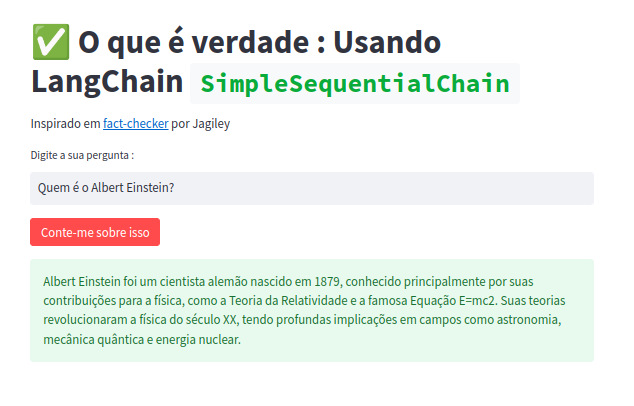